<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install(['seaborn'])
import seaborn as sns
import numpy as np

<ipython-input-1-331341119083>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


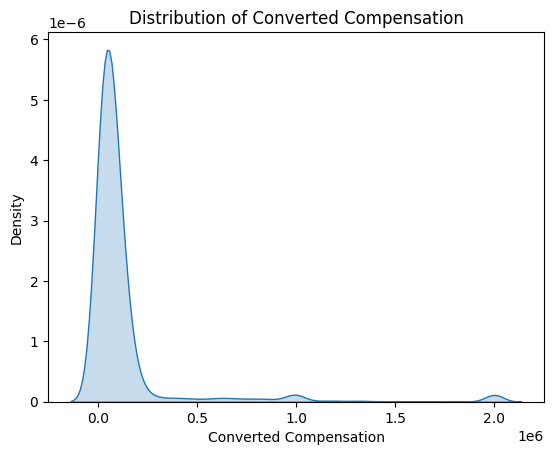

In [7]:
# your code goes here

# Plot the distribution curve for 'ConvertedComp'
sns.kdeplot(df['ConvertedComp'].dropna(), fill=True)

# Add labels and title
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')

# Display the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


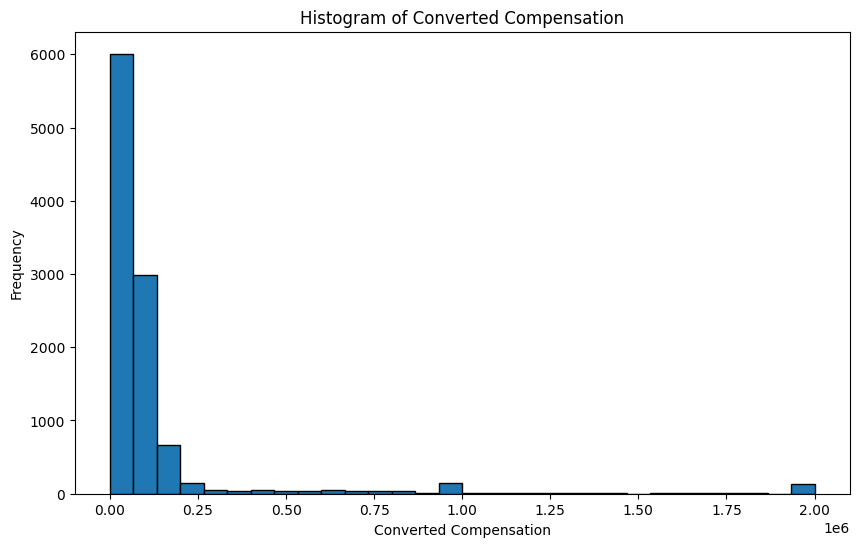

In [8]:
# your code goes here
# Plot the histogram for 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
# Calculate the median of the 'ConvertedComp' column
median_converted_comp = df['ConvertedComp'].median()

# Display the result
print(f"The median of the 'ConvertedComp' column is: {median_converted_comp}")

The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
# Count the number of respondents who identified as 'Man'
num_men = df[df['Gender'] == 'Man'].shape[0]

# Display the result
print(f"Number of respondents who identified as 'Man': {num_men}")

Number of respondents who identified as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
# Filter the data for respondents who identified as 'Woman'
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

# Display the result
print(f"Median ConvertedComp for respondents who identified as a Woman: {median_converted_comp_woman}")

Median ConvertedComp for respondents who identified as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
# Five-number summary using describe
five_number_summary = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]

# Display the result
print(five_number_summary)

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


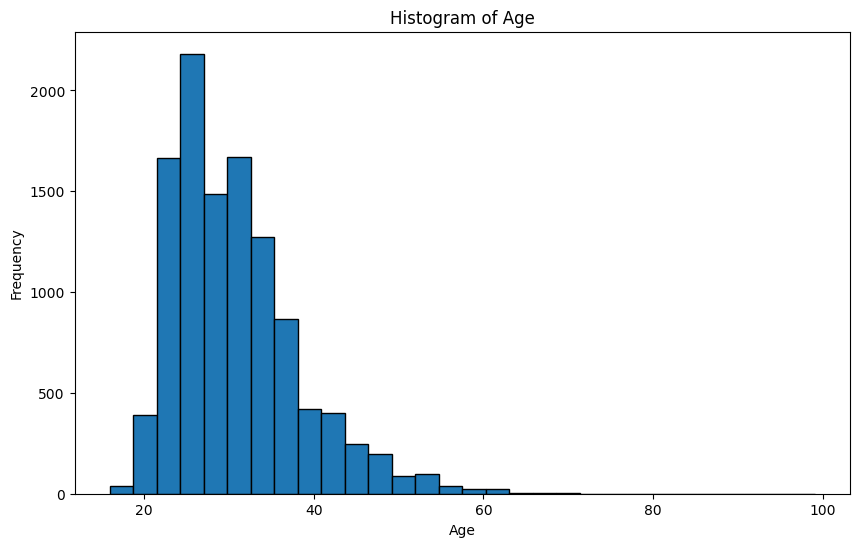

In [13]:
# your code goes here
# Plot the histogram for 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


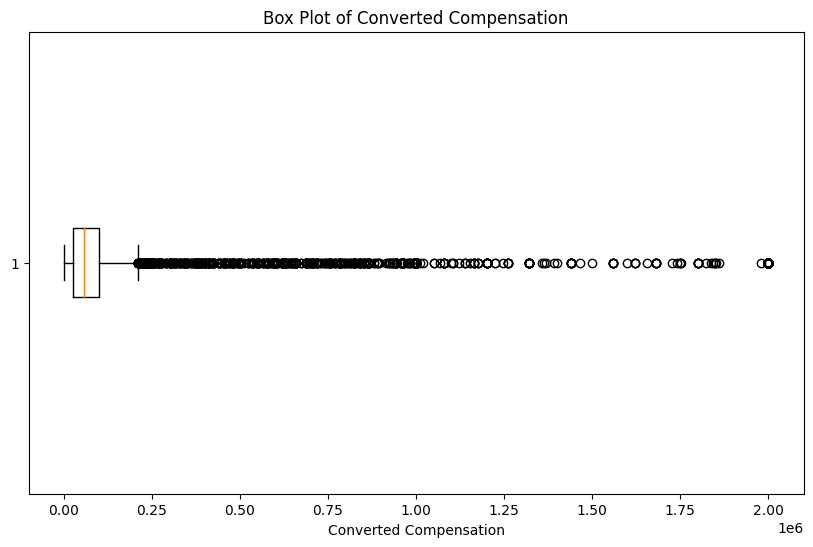

In [14]:
# your code goes here
# Plot a box plot for 'ConvertedComp' to detect outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
# Calculate Q1 and Q3
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Display the IQR
print(f"Interquartile Range (IQR) for ConvertedComp: {iqr}")

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [16]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Display the result
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Lower bound: 10.0, Upper bound: 50.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
len(df[df['ConvertedComp'] > upper_bound])

10551

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
df['ConvertedComp'].mean()

131596.7316197316

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here

# Select only numeric columns in the DataFrame
numeric_df = df.select_dtypes(include='number')

# Compute the correlation of 'Age' with other numeric columns
age_corr = numeric_df.corr()['Age']

# Display the correlation values for 'Age'
print(age_corr)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
